In [ ]:
# !pip install yellowbrick


#### Using the available dataset, build a model that will predict the value of the target variable bad_flag

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

RANDOM_SEED = 42



In [65]:
df = pd.read_csv('./Datasets/Flagging Loans/test_task.csv')

In [66]:
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [68]:
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
loanKey,4157.0,525386.651431,202001.338206,58567.000000,363964.000000,543603.000000,687271.000000,884377.000000
dpd_5_cnt,675.0,1.444444,0.900599,0.000000,1.000000,1.000000,2.000000,7.000000
dpd_15_cnt,675.0,0.733333,0.764572,0.000000,0.000000,1.000000,1.000000,5.000000
dpd_30_cnt,675.0,0.280000,0.502339,0.000000,0.000000,0.000000,1.000000,3.000000
close_loans_cnt,4142.0,1.184693,1.723715,0.000000,0.000000,1.000000,2.000000,31.000000
TraderKey,4157.0,12.338225,9.902927,1.000000,6.000000,6.000000,14.000000,80.000000
payment_type_0,4157.0,0.018523,0.330359,0.000000,0.000000,0.000000,0.000000,15.000000
payment_type_1,4157.0,0.596103,2.564887,0.000000,0.000000,0.000000,0.000000,81.000000
payment_type_2,4157.0,3.755834,3.810703,0.000000,1.000000,3.000000,6.000000,33.000000
payment_type_3,4157.0,0.758239,2.212487,0.000000,0.000000,0.000000,0.000000,35.000000


In [69]:
# Percentage of Missing Values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
score_2,score_2,94.250662
dpd_5_cnt,dpd_5_cnt,83.762329
dpd_15_cnt,dpd_15_cnt,83.762329
dpd_30_cnt,dpd_30_cnt,83.762329
first_overdue_date,first_overdue_date,83.762329
score_1,score_1,15.636276
past_billings_cnt,past_billings_cnt,5.965841
close_loans_cnt,close_loans_cnt,0.360837
federal_district_nm,federal_district_nm,0.264614
loanKey,loanKey,0.000000


In [70]:
# Let's look at unique values
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")

unique values of loanKey are:  [708382 406305 779736 ... 645359 730681 521420]
-----------------------------------------------------
unique values of rep_loan_date are:  ['2016-10-06' '2016-03-26' '2016-10-30' '2016-06-29' '2015-12-01'
 '2016-10-01' '2016-02-18' '2015-11-23' '2016-09-19' '2015-11-22'
 '2016-05-27' '2015-11-15' '2015-12-27' '2015-12-04' '2016-05-19'
 '2016-08-29' '2015-07-28' '2016-03-15' '2015-10-20' '2015-12-06'
 '2016-06-09' '2015-10-23' '2016-01-09' '2016-02-21' '2016-07-14'
 '2016-03-19' '2016-10-20' '2016-04-07' '2016-06-10' '2016-10-04'
 '2016-02-04' '2016-07-11' '2015-11-01' '2016-03-08' '2016-09-07'
 '2016-10-31' '2016-08-18' '2015-06-18' '2015-09-02' '2015-11-10'
 '2015-12-20' '2016-10-05' '2016-12-19' '2015-12-15' '2016-11-05'
 '2016-10-13' '2015-12-16' '2016-12-07' '2016-09-24' '2016-07-26'
 '2016-08-03' '2016-11-12' '2016-09-10' '2016-08-31' '2016-02-23'
 '2015-10-28' '2016-01-24' '2015-09-28' '2016-11-04' '2015-12-17'
 '2016-06-07' '2016-06-01' '2016-12-28

#### Date manipulation

In [71]:
# calculate difference in days between the first and the repeated loan
df[["rep_loan_date", "first_loan"]] = df[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
df["days_between_rep_and_first_loan"] = (df["rep_loan_date"] - df["first_loan"]).dt.days

## Dummy Value creation for categorical values

In [72]:
federal_gender_districts = pd.get_dummies(df[["federal_district_nm",'gender']], drop_first=True,dtype='float')
federal_gender_districts

,gender,federal_district_nm_region_1,federal_district_nm_region_2,federal_district_nm_region_3,federal_district_nm_region_4,federal_district_nm_region_5,federal_district_nm_region_6,federal_district_nm_region_7
0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4152,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4153,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4154,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4155,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
df.drop(["federal_district_nm",'gender'],axis=1,inplace=True)

In [74]:
df = pd.concat([df,federal_gender_districts],axis=1)

In [75]:
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,TraderKey,payment_type_0,...,bad_flag,days_between_rep_and_first_loan,gender,federal_district_nm_region_1,federal_district_nm_region_2,federal_district_nm_region_3,federal_district_nm_region_4,federal_district_nm_region_5,federal_district_nm_region_6,federal_district_nm_region_7
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,6,0,...,0,328,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,6,0,...,0,180,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,6,0,...,0,314,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,14,0,...,0,365,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,22,0,...,0,120,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [76]:
# since most of the classifiers we're evaluating don't accept NaN values,
# we're replacing them with zeros - a neutral value
df.fillna(value=0, inplace=True)

In [77]:
# define the numerical input columns
X_columns = [
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age",
    "days_between_rep_and_first_loan",
    "gender"
]

# append to them the categorical ones
X_columns = X_columns + list(federal_gender_districts.columns)
X_columns

['dpd_5_cnt',
 'dpd_15_cnt',
 'dpd_30_cnt',
 'close_loans_cnt',
 'payment_type_0',
 'payment_type_1',
 'payment_type_2',
 'payment_type_3',
 'payment_type_4',
 'past_billings_cnt',
 'score_1',
 'score_2',
 'age',
 'days_between_rep_and_first_loan',
 'gender',
 'gender',
 'federal_district_nm_region_1',
 'federal_district_nm_region_2',
 'federal_district_nm_region_3',
 'federal_district_nm_region_4',
 'federal_district_nm_region_5',
 'federal_district_nm_region_6',
 'federal_district_nm_region_7']

## Train Test Split

In [78]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(df[X_columns], df["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=df["bad_flag"])

In [79]:
# define the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED)
]

In [86]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    print(classification_report(y_test,y_pred))
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)
    print('----------------------------------------------------------------------------------------------------------------------------')

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       749
           1       0.67      0.02      0.05        83

    accuracy                           0.90       832
   macro avg       0.78      0.51      0.50       832
weighted avg       0.88      0.90      0.86       832

SGDClassifier : 0.046511627906976744
----------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       749
           1       0.41      0.13      0.20        83

    accuracy                           0.89       832
   macro avg       0.66      0.56      0.57       832
weighted avg       0.86      0.89      0.87       832

KNeighborsClassifier : 0.2
----------------------------------------------------------------------------------------------------------------------------
              precision    recal

/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       749
           1       0.00      0.00      0.00        83

    accuracy                           0.90       832
   macro avg       0.45      0.50      0.47       832
weighted avg       0.81      0.90      0.85       832

LogisticRegressionCV : 0.0
----------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       749
           1       0.30      0.11      0.16        83

    accuracy                           0.89       832
   macro avg       0.60      0.54      0.55       832
weighted avg       0.85      0.89      0.86       832

BaggingClassifier : 0.1592920353982301
----------------------------------------------------------------------------------------------------------------------------
              precision    rec

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

for classifier in classifiers:
    visualizer = classification_report(y_test,y_pred)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

In [83]:
# Stratified K-fold
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=RANDOM_SEED)
pred_test_full =0
cv_score =[]
i=1

for train_index,test_index in kf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.5122972129783694
2 of KFold 5
ROC AUC score: 0.5037836840162421
3 of KFold 5
ROC AUC score: 0.5075068870523416
4 of KFold 5
ROC AUC score: 0.5111890862418748
5 of KFold 5
ROC AUC score: 0.5128122826726582


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

## Addressing Class-Imbalance
The challenge with class-imbalanced data sets is that most machine learning algorithms ignore, or perform poorly on the minority class, which often is the most important class. To address the class imbalance, numerous methods have been developed. Amongst others, the most popular seem to be the following:

- Over-sampling the minority class
- Under-sampling the majority class
- Assigning class weights to the data samples
- Synthetically generating new data, e.g., SMOTE

In [63]:
# !pip install imblearn

In [ ]:
pos_examples = df["bad_flag"].sum()
neg_examples = df.shape[0] - pos_examples

print("Positive examples", pos_examples, ", negative examples", neg_examples)

## under-sampling
undersample_nonChurn=df[df['bad_flag']==0].sample(pos_examples)
print(undersample_nonChurn.shape)
# Over Sampling
oversampled_churn = df[df['bad_flag']==1].sample(neg_examples, replace=True)
print(oversampled_churn.shape)

#Using SMOTE, oversample minority. Split dataset into x and y first......pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, y)
#Join data
x_y=pd.concat([y_sm,x_sm],axis=0)

Positive examples 417 , negative examples 3740
(417, 29)
(3740, 29)


## Hyper Parameter Optimization

In [90]:
# !pip install optuna

In [91]:
import optuna

/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [92]:
def objective(trial: optuna.Trial):
    """The objective function that we will try to maximize."""
    # suggest min. and max. values for the parameters that we want to tune
    n_neighbors = trial.suggest_int(name="n_neighbors", low=1, high=10)
    weights = trial.suggest_categorical(name="weights", choices=["uniform", "distance"])
    algorithm = trial.suggest_categorical(name="algorithm", choices=["ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int(name="leaf_size", low=1, high=40)
    p = trial.suggest_categorical(name="p", choices=[1, 2])

    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)

    classifier = classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    return f1_score(y_true=y_test, y_pred=y_pred)

In [93]:
# make the sampler behave in a deterministic way.
sampler = optuna.samplers.TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction='maximize', study_name="KNeigbors", sampler=sampler)
study.optimize(objective, n_trials=10)

[I 2024-04-02 10:47:00,991] A new study created in memory with name: KNeigbors
[I 2024-04-02 10:47:01,016] Trial 0 finished with value: 0.15841584158415842 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 3, 'p': 1}. Best is trial 0 with value: 0.15841584158415842.
[I 2024-04-02 10:47:01,029] Trial 1 finished with value: 0.13999999999999999 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 8, 'p': 2}. Best is trial 0 with value: 0.15841584158415842.
[I 2024-04-02 10:47:01,115] Trial 2 finished with value: 0.18018018018018017 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 19, 'p': 1}. Best is trial 2 with value: 0.18018018018018017.
[I 2024-04-02 10:47:01,150] Trial 3 finished with value: 0.12631578947368421 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 38, 'p': 1}. Best is trial 2 with value: 0.1801

In [94]:
study.best_params

{'n_neighbors': 4,
 'weights': 'distance',
 'algorithm': 'brute',
 'leaf_size': 2,
 'p': 1}

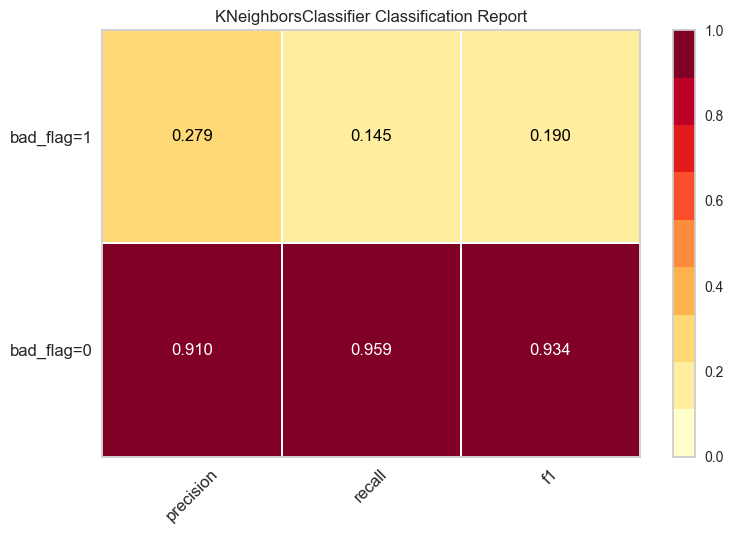

In [97]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(KNeighborsClassifier(**study.best_params), classes=["bad_flag=0", "bad_flag=1"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
_ = visualizer.show()